In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from io import StringIO
import os
from tqdm import tqdm
import polars.selectors as cs
import re


### Normalization for played minutes
The described metrics are not normalized for played minutes
For fair comparison this has to be done

In [2]:
# Normalization for played minutes

In [3]:
csv_path = "./data_summary.csv"

In [4]:
df = pl.read_csv(csv_path)

In [5]:
pl.Config.set_tbl_cols(150)
df.head()

Count HSR,Count HSR 1,Count HSR 2,Count HSR OTIP,Count HSR OTIP 1,Count HSR OTIP 2,Count HSR TIP,Count HSR TIP 1,Count HSR TIP 2,Count High Acceleration,Count High Acceleration 1,Count High Acceleration 2,Count High Acceleration OTIP,Count High Acceleration OTIP 1,Count High Acceleration OTIP 2,Count High Acceleration TIP,Count High Acceleration TIP 1,Count High Acceleration TIP 2,Count High Deceleration,Count High Deceleration 1,Count High Deceleration 2,Count High Deceleration OTIP,Count High Deceleration OTIP 1,Count High Deceleration OTIP 2,Count High Deceleration TIP,Count High Deceleration TIP 1,Count High Deceleration TIP 2,Count Medium Acceleration,Count Medium Acceleration 1,Count Medium Acceleration 2,Count Medium Acceleration OTIP,Count Medium Acceleration OTIP 1,Count Medium Acceleration OTIP 2,Count Medium Acceleration TIP,Count Medium Acceleration TIP 1,Count Medium Acceleration TIP 2,Count Medium Deceleration,Count Medium Deceleration 1,Count Medium Deceleration 2,Count Medium Deceleration OTIP,Count Medium Deceleration OTIP 1,Count Medium Deceleration OTIP 2,Count Medium Deceleration TIP,Count Medium Deceleration TIP 1,Count Medium Deceleration TIP 2,Count Sprint,Count Sprint 1,Count Sprint 2,Count Sprint OTIP,Count Sprint OTIP 1,Count Sprint OTIP 2,Count Sprint TIP,Count Sprint TIP 1,Count Sprint TIP 2,Distance,Distance 1,Distance 2,Distance OTIP,Distance OTIP 1,Distance OTIP 2,Distance TIP,Distance TIP 1,Distance TIP 2,HSR Distance,HSR Distance 1,HSR Distance 2,HSR Distance OTIP,HSR Distance OTIP 1,HSR Distance OTIP 2,HSR Distance TIP,HSR Distance TIP 1,HSR Distance TIP 2,Minutes,Minutes 1,Minutes 2,Minutes OTIP,Minutes OTIP 1,Minutes OTIP 2,Minutes TIP,Minutes TIP 1,Minutes TIP 2,PSV-99,Running Distance,Running Distance 1,Running Distance 2,Running Distance OTIP,Running Distance OTIP 1,Running Distance OTIP 2,Running Distance TIP,Running Distance TIP 1,Running Distance TIP 2,Sprinting Distance,Sprinting Distance 1,Sprinting Distance 2,Sprinting Distance OTIP,Sprinting Distance OTIP 1,Sprinting Distance OTIP 2,Sprinting Distance TIP,Sprinting Distance TIP 1,Sprinting Distance TIP 2,competition_age_group,competition_area,competition_edition_id,competition_gender,competition_id,competition_name,date,full_comp_name,group,match_id,match_name,player_birthdate,player_id,player_name,position,quality_check,season_end_year,season_id,season_name,season_start_year,short_name,team,team_id,team_name
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,str,i64,str,str,str,str,i64,str,str,i64,str,str,bool,i64,i64,str,i64,str,str,i64,str
59,33,26,34,17,17,19,13,6,4,3,1,0,0,0,0,0,0,11,8,3,4,3,1,3,2,1,100,52,48,47,24,23,22,12,10,89,42,47,34,17,17,17,8,9,5,3,2,2,1,1,2,1,1,13026,6810,6216,5727,2983,2744,3432,1874,1558,745,387,358,443,225,218,260,139,121,96.63,47.15,49.48,35.57,18.27,17.3,24.21,13.13,11.08,25.7,2415,1354,1061,1504,842,662,661,369,292,148,92,56,45,27,18,30,11,19,"""adult""","""BEL""",249,"""male""",16,"""Pro League""","""2021-07-25""","""BEL - Pro League - 2021/2022""","""Midfield""",44999,"""KV Mechelen v Royal Antwerp FC""","""1995-02-17""",8701,"""Pieter Gerkens""","""AM""",true,2022,8,"""2021/2022""",2021,"""P. Gerkens""","""Royal Antwerp FC""",462,"""Royal Antwerp FC"""
39,20,19,17,10,7,20,9,11,5,3,2,1,0,1,2,1,1,8,5,3,1,1,0,2,1,1,77,36,41,32,15,17,25,11,14,77,31,46,25,11,14,20,9,11,8,3,5,1,1,0,4,1,3,9969,4842,5127,3534,1795,1739,3435,1660,1775,476,201,275,167,104,63,265,81,184,96.19,46.12,50.07,29.59,14.52,15.07,25.52,13.2,12.32,28.3,1101,489,612,402,178,224,610,267,343,202,48,154,24,24,0,136,17,119,"""adult""","""BEL""",249,"""male""",16,"""Pro League""","

In [6]:
df.columns

['Count HSR',
 'Count HSR 1',
 'Count HSR 2',
 'Count HSR OTIP',
 'Count HSR OTIP 1',
 'Count HSR OTIP 2',
 'Count HSR TIP',
 'Count HSR TIP 1',
 'Count HSR TIP 2',
 'Count High Acceleration',
 'Count High Acceleration 1',
 'Count High Acceleration 2',
 'Count High Acceleration OTIP',
 'Count High Acceleration OTIP 1',
 'Count High Acceleration OTIP 2',
 'Count High Acceleration TIP',
 'Count High Acceleration TIP 1',
 'Count High Acceleration TIP 2',
 'Count High Deceleration',
 'Count High Deceleration 1',
 'Count High Deceleration 2',
 'Count High Deceleration OTIP',
 'Count High Deceleration OTIP 1',
 'Count High Deceleration OTIP 2',
 'Count High Deceleration TIP',
 'Count High Deceleration TIP 1',
 'Count High Deceleration TIP 2',
 'Count Medium Acceleration',
 'Count Medium Acceleration 1',
 'Count Medium Acceleration 2',
 'Count Medium Acceleration OTIP',
 'Count Medium Acceleration OTIP 1',
 'Count Medium Acceleration OTIP 2',
 'Count Medium Acceleration TIP',
 'Count Medium A

In [7]:
# creating a dataframe that only contains the columns that need to be normalized for played minutes
# in the end the normalized dataframe will be merged with the original dataframe 
normalization_df = df.drop('PSV-99','competition_age_group',
 'competition_area',
 'competition_edition_id',
 'competition_gender',
 'competition_id',
 'competition_name',
 'date',
 'full_comp_name',
 'group',
 'match_id',
 'match_name',
 'player_birthdate',
 'player_id',
 'player_name',
 'position',
 'quality_check',
 'season_end_year',
 'season_id',
 'season_name',
 'season_start_year',
 'short_name',
 'team',
 'team_id',
 'team_name')

In [8]:
#storing the columns that don't have to be normalized seperatly
not_for_normalization = df.select(['PSV-99','competition_age_group',
 'competition_area',
 'competition_edition_id',
 'competition_gender',
 'competition_id',
 'competition_name',
 'date',
 'full_comp_name',
 'group',
 'match_id',
 'match_name',
 'player_birthdate',
 'player_id',
 'player_name',
 'position',
 'quality_check',
 'season_end_year',
 'season_id',
 'season_name',
 'season_start_year',
 'short_name',
 'team',
 'team_id',
 'team_name'])

In [9]:
not_for_normalization.shape

(449537, 25)

In [10]:
normalization_df.columns

['Count HSR',
 'Count HSR 1',
 'Count HSR 2',
 'Count HSR OTIP',
 'Count HSR OTIP 1',
 'Count HSR OTIP 2',
 'Count HSR TIP',
 'Count HSR TIP 1',
 'Count HSR TIP 2',
 'Count High Acceleration',
 'Count High Acceleration 1',
 'Count High Acceleration 2',
 'Count High Acceleration OTIP',
 'Count High Acceleration OTIP 1',
 'Count High Acceleration OTIP 2',
 'Count High Acceleration TIP',
 'Count High Acceleration TIP 1',
 'Count High Acceleration TIP 2',
 'Count High Deceleration',
 'Count High Deceleration 1',
 'Count High Deceleration 2',
 'Count High Deceleration OTIP',
 'Count High Deceleration OTIP 1',
 'Count High Deceleration OTIP 2',
 'Count High Deceleration TIP',
 'Count High Deceleration TIP 1',
 'Count High Deceleration TIP 2',
 'Count Medium Acceleration',
 'Count Medium Acceleration 1',
 'Count Medium Acceleration 2',
 'Count Medium Acceleration OTIP',
 'Count Medium Acceleration OTIP 1',
 'Count Medium Acceleration OTIP 2',
 'Count Medium Acceleration TIP',
 'Count Medium A

<Axes: xlabel='Minutes', ylabel='Distance'>

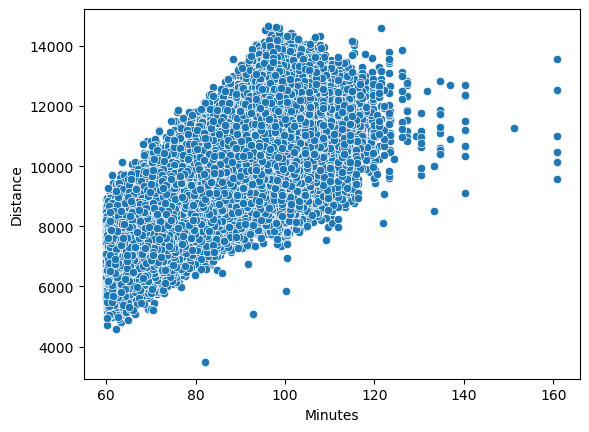

In [11]:
# checking if the data is really not normalized
sns.scatterplot(data=normalization_df,
                x = "Minutes",
                y = "Distance")

In [12]:
normalization_copy = normalization_df

In [13]:
'''
# looping through the columns
# matching them with the corresponding time metric
# normalizing the metric

list2skip = [ 'Minutes',
 'Minutes 1',
 'Minutes 2',
 'Minutes OTIP',
 'Minutes OTIP 1',
 'Minutes OTIP 2',
 'Minutes TIP',
 'Minutes TIP 1',
 'Minutes TIP 2']

for coln in tqdm(normalization_df.columns):
    if coln in list2skip:
        continue

    else:
        if re.search("OTIP 2", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes OTIP 2")).alias(f"normalised {coln}")
            )
        elif re.search("OTIP 1", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes OTIP 1")).alias(f"normalised {coln}")
            )
        elif re.search("TIP 2", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes TIP 2")).alias(f"normalised {coln}")
            )
        elif re.search("TIP 1", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes TIP 1")).alias(f"normalised {coln}")
            )
        elif re.search("OTIP", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes OTIP")).alias(f"normalised {coln}")
            )
        elif re.search("TIP", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes TIP")).alias(f"normalised {coln}")
            )
        elif re.search("2", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes 2")).alias(f"normalised {coln}")
            )
        elif re.search("1", coln):
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes 1")).alias(f"normalised {coln}")
            )
        else:
            normalization_df = normalization_df.with_columns(
                (pl.col(coln)/pl.col("Minutes")).alias(f"normalised {coln}")
            )
'''


'\n# looping through the columns\n# matching them with the corresponding time metric\n# normalizing the metric\n\nlist2skip = [ \'Minutes\',\n \'Minutes 1\',\n \'Minutes 2\',\n \'Minutes OTIP\',\n \'Minutes OTIP 1\',\n \'Minutes OTIP 2\',\n \'Minutes TIP\',\n \'Minutes TIP 1\',\n \'Minutes TIP 2\']\n\nfor coln in tqdm(normalization_df.columns):\n    if coln in list2skip:\n        continue\n\n    else:\n        if re.search("OTIP 2", coln):\n            normalization_df = normalization_df.with_columns(\n                (pl.col(coln)/pl.col("Minutes OTIP 2")).alias(f"normalised {coln}")\n            )\n        elif re.search("OTIP 1", coln):\n            normalization_df = normalization_df.with_columns(\n                (pl.col(coln)/pl.col("Minutes OTIP 1")).alias(f"normalised {coln}")\n            )\n        elif re.search("TIP 2", coln):\n            normalization_df = normalization_df.with_columns(\n                (pl.col(coln)/pl.col("Minutes TIP 2")).alias(f"normalised {coln}")\n 

In [18]:
# skipping over the minute columns, thay don't have to be normalized ofc

list2skip = [
    'Minutes', 'Minutes 1', 'Minutes 2',
    'Minutes OTIP', 'Minutes OTIP 1', 'Minutes OTIP 2',
    'Minutes TIP', 'Minutes TIP 1', 'Minutes TIP 2'
]

# creating a dictionary containing the patterns to match to avoid redundancy
time_indicators = {
    "OTIP 2": "Minutes OTIP 2",
    "OTIP 1": "Minutes OTIP 1",
    "TIP 2": "Minutes TIP 2",
    "TIP 1": "Minutes TIP 1",
    "OTIP": "Minutes OTIP",
    "TIP": "Minutes TIP",
    "2": "Minutes 2",
    "1": "Minutes 1"
}

# iterating over the columns to match them to the correct time / minute column
# normalizing the metrics for the time played
for coln in tqdm(normalization_df.columns):
    if coln in list2skip:
        continue

    for pattern, indicator in time_indicators.items():
        if pattern in coln:
            divisor = indicator
            break
    else:
        divisor = "Minutes"

    normalization_df = normalization_df.with_columns(
        ((pl.col(coln) / pl.col(divisor))*90).alias(f"P90_{coln}")
    )

100%|██████████| 198/198 [00:08<00:00, 24.05it/s]


<Axes: xlabel='Minutes', ylabel='P90_Distance'>

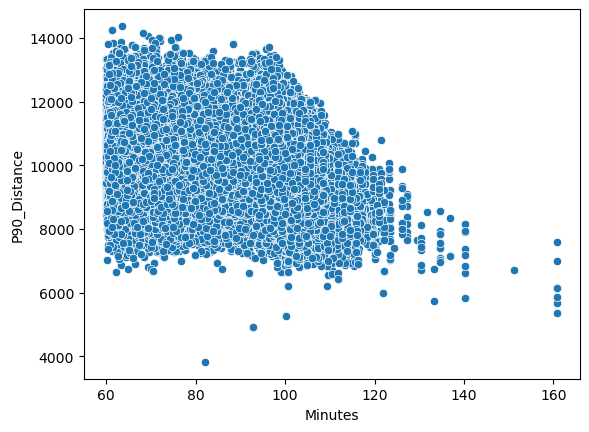

In [17]:
#checking if the data is on a 90 minute scale
# checking if the data is really not normalized
sns.scatterplot(data=normalization_df,
                x = "Minutes",
                y = "P90_Distance")

In [16]:
normalization_df.head()

Count HSR,Count HSR 1,Count HSR 2,Count HSR OTIP,Count HSR OTIP 1,Count HSR OTIP 2,Count HSR TIP,Count HSR TIP 1,Count HSR TIP 2,Count High Acceleration,Count High Acceleration 1,Count High Acceleration 2,Count High Acceleration OTIP,Count High Acceleration OTIP 1,Count High Acceleration OTIP 2,Count High Acceleration TIP,Count High Acceleration TIP 1,Count High Acceleration TIP 2,Count High Deceleration,Count High Deceleration 1,Count High Deceleration 2,Count High Deceleration OTIP,Count High Deceleration OTIP 1,Count High Deceleration OTIP 2,Count High Deceleration TIP,Count High Deceleration TIP 1,Count High Deceleration TIP 2,Count Medium Acceleration,Count Medium Acceleration 1,Count Medium Acceleration 2,Count Medium Acceleration OTIP,Count Medium Acceleration OTIP 1,Count Medium Acceleration OTIP 2,Count Medium Acceleration TIP,Count Medium Acceleration TIP 1,Count Medium Acceleration TIP 2,Count Medium Deceleration,Count Medium Deceleration 1,Count Medium Deceleration 2,Count Medium Deceleration OTIP,Count Medium Deceleration OTIP 1,Count Medium Deceleration OTIP 2,Count Medium Deceleration TIP,Count Medium Deceleration TIP 1,Count Medium Deceleration TIP 2,Count Sprint,Count Sprint 1,Count Sprint 2,Count Sprint OTIP,Count Sprint OTIP 1,Count Sprint OTIP 2,Count Sprint TIP,Count Sprint TIP 1,Count Sprint TIP 2,Distance,Distance 1,Distance 2,Distance OTIP,Distance OTIP 1,Distance OTIP 2,Distance TIP,Distance TIP 1,Distance TIP 2,HSR Distance,HSR Distance 1,HSR Distance 2,HSR Distance OTIP,HSR Distance OTIP 1,HSR Distance OTIP 2,HSR Distance TIP,HSR Distance TIP 1,HSR Distance TIP 2,Minutes,Minutes 1,Minutes 2,…,normalised Count High Acceleration TIP,normalised Count High Acceleration TIP 1,normalised Count High Acceleration TIP 2,normalised Count High Deceleration,normalised Count High Deceleration 1,normalised Count High Deceleration 2,normalised Count High Deceleration OTIP,normalised Count High Deceleration OTIP 1,normalised Count High Deceleration OTIP 2,normalised Count High Deceleration TIP,normalised Count High Deceleration TIP 1,normalised Count High Deceleration TIP 2,normalised Count Medium Acceleration,normalised Count Medium Acceleration 1,normalised Count Medium Acceleration 2,normalised Count Medium Acceleration OTIP,normalised Count Medium Acceleration OTIP 1,normalised Count Medium Acceleration OTIP 2,normalised Count Medium Acceleration TIP,normalised Count Medium Acceleration TIP 1,normalised Count Medium Acceleration TIP 2,normalised Count Medium Deceleration,normalised Count Medium Deceleration 1,normalised Count Medium Deceleration 2,normalised Count Medium Deceleration OTIP,normalised Count Medium Deceleration OTIP 1,normalised Count Medium Deceleration OTIP 2,normalised Count Medium Deceleration TIP,normalised Count Medium Deceleration TIP 1,normalised Count Medium Deceleration TIP 2,normalised Count Sprint,normalised Count Sprint 1,normalised Count Sprint 2,normalised Count Sprint OTIP,normalised Count Sprint OTIP 1,normalised Count Sprint OTIP 2,normalised Count Sprint TIP,normalised Count Sprint TIP 1,normalised Count Sprint TIP 2,normalised Distance,normalised Distance 1,normalised Distance 2,normalised Distance OTIP,normalised Distance OTIP 1,normalised Distance OTIP 2,normalised Distance TIP,normalised Distance TIP 1,normalised Distance TIP 2,normalised HSR Distance,normalised HSR Distance 1,normalised HSR Distance 2,normalised HSR Distance OTIP,normalised HSR Distance OTIP 1,normalised HSR Distance OTIP 2,normalised HSR Distance TIP,normalised HSR Distance TIP 1,normalised HSR Distance TIP 2,normalised Running Distance,normalised Running Distance 1,normalised Running Distance 2,normalised Running Distance OTIP,normalised Running Distance OTIP 1,normalised Running Distance OTIP 2,normalised Running Distance TIP,normalised Running Distance TIP 1,normalised Running Distance TIP 2,normalised Sprinting Distance,normalised Sprinting Distance 1,normalised Sprinting Distance 2,normalised Sprinting

In [19]:
normalization_df.columns

['Count HSR',
 'Count HSR 1',
 'Count HSR 2',
 'Count HSR OTIP',
 'Count HSR OTIP 1',
 'Count HSR OTIP 2',
 'Count HSR TIP',
 'Count HSR TIP 1',
 'Count HSR TIP 2',
 'Count High Acceleration',
 'Count High Acceleration 1',
 'Count High Acceleration 2',
 'Count High Acceleration OTIP',
 'Count High Acceleration OTIP 1',
 'Count High Acceleration OTIP 2',
 'Count High Acceleration TIP',
 'Count High Acceleration TIP 1',
 'Count High Acceleration TIP 2',
 'Count High Deceleration',
 'Count High Deceleration 1',
 'Count High Deceleration 2',
 'Count High Deceleration OTIP',
 'Count High Deceleration OTIP 1',
 'Count High Deceleration OTIP 2',
 'Count High Deceleration TIP',
 'Count High Deceleration TIP 1',
 'Count High Deceleration TIP 2',
 'Count Medium Acceleration',
 'Count Medium Acceleration 1',
 'Count Medium Acceleration 2',
 'Count Medium Acceleration OTIP',
 'Count Medium Acceleration OTIP 1',
 'Count Medium Acceleration OTIP 2',
 'Count Medium Acceleration TIP',
 'Count Medium A

In [20]:
# combining the normalized data frame together with the 
final_df = pl.concat([normalization_df, not_for_normalization], how = "horizontal")
final_df.shape

(449537, 322)

In [22]:
final_df.head()

Count HSR,Count HSR 1,Count HSR 2,Count HSR OTIP,Count HSR OTIP 1,Count HSR OTIP 2,Count HSR TIP,Count HSR TIP 1,Count HSR TIP 2,Count High Acceleration,Count High Acceleration 1,Count High Acceleration 2,Count High Acceleration OTIP,Count High Acceleration OTIP 1,Count High Acceleration OTIP 2,Count High Acceleration TIP,Count High Acceleration TIP 1,Count High Acceleration TIP 2,Count High Deceleration,Count High Deceleration 1,Count High Deceleration 2,Count High Deceleration OTIP,Count High Deceleration OTIP 1,Count High Deceleration OTIP 2,Count High Deceleration TIP,Count High Deceleration TIP 1,Count High Deceleration TIP 2,Count Medium Acceleration,Count Medium Acceleration 1,Count Medium Acceleration 2,Count Medium Acceleration OTIP,Count Medium Acceleration OTIP 1,Count Medium Acceleration OTIP 2,Count Medium Acceleration TIP,Count Medium Acceleration TIP 1,Count Medium Acceleration TIP 2,Count Medium Deceleration,Count Medium Deceleration 1,Count Medium Deceleration 2,Count Medium Deceleration OTIP,Count Medium Deceleration OTIP 1,Count Medium Deceleration OTIP 2,Count Medium Deceleration TIP,Count Medium Deceleration TIP 1,Count Medium Deceleration TIP 2,Count Sprint,Count Sprint 1,Count Sprint 2,Count Sprint OTIP,Count Sprint OTIP 1,Count Sprint OTIP 2,Count Sprint TIP,Count Sprint TIP 1,Count Sprint TIP 2,Distance,Distance 1,Distance 2,Distance OTIP,Distance OTIP 1,Distance OTIP 2,Distance TIP,Distance TIP 1,Distance TIP 2,HSR Distance,HSR Distance 1,HSR Distance 2,HSR Distance OTIP,HSR Distance OTIP 1,HSR Distance OTIP 2,HSR Distance TIP,HSR Distance TIP 1,HSR Distance TIP 2,Minutes,Minutes 1,Minutes 2,…,P90_P90_Count Sprint OTIP 1,P90_P90_Count Sprint OTIP 2,P90_P90_Count Sprint TIP,P90_P90_Count Sprint TIP 1,P90_P90_Count Sprint TIP 2,P90_P90_Distance,P90_P90_Distance 1,P90_P90_Distance 2,P90_P90_Distance OTIP,P90_P90_Distance OTIP 1,P90_P90_Distance OTIP 2,P90_P90_Distance TIP,P90_P90_Distance TIP 1,P90_P90_Distance TIP 2,P90_P90_HSR Distance,P90_P90_HSR Distance 1,P90_P90_HSR Distance 2,P90_P90_HSR Distance OTIP,P90_P90_HSR Distance OTIP 1,P90_P90_HSR Distance OTIP 2,P90_P90_HSR Distance TIP,P90_P90_HSR Distance TIP 1,P90_P90_HSR Distance TIP 2,P90_P90_Minutes,P90_P90_Minutes 1,P90_P90_Minutes 2,P90_P90_Minutes OTIP,P90_P90_Minutes OTIP 1,P90_P90_Minutes OTIP 2,P90_P90_Minutes TIP,P90_P90_Minutes TIP 1,P90_P90_Minutes TIP 2,P90_P90_Running Distance,P90_P90_Running Distance 1,P90_P90_Running Distance 2,P90_P90_Running Distance OTIP,P90_P90_Running Distance OTIP 1,P90_P90_Running Distance OTIP 2,P90_P90_Running Distance TIP,P90_P90_Running Distance TIP 1,P90_P90_Running Distance TIP 2,P90_P90_Sprinting Distance,P90_P90_Sprinting Distance 1,P90_P90_Sprinting Distance 2,P90_P90_Sprinting Distance OTIP,P90_P90_Sprinting Distance OTIP 1,P90_P90_Sprinting Distance OTIP 2,P90_P90_Sprinting Distance TIP,P90_P90_Sprinting Distance TIP 1,P90_P90_Sprinting Distance TIP 2,PSV-99,competition_age_group,competition_area,competition_edition_id,competition_gender,competition_id,competition_name,date,full_comp_name,group,match_id,match_name,player_birthdate,player_id,player_name,position,quality_check,season_end_year,season_id,season_name,season_start_year,short_name,team,team_id,team_name
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,str,str,str,str,i64,str,str,i64,str,str,bool,i64,i64,str,i64,str,str,i64,str
59,33,26,34,17,17,19,13,6,4,3,1,0,0,0,0,0,0,11,8,3,4,3,1,3,2,1,100,52,48,47,24,23,22,12,10,89,42,47,34,17,17,17,8,9,5,3,2,2,1,1,2,1,1,13026,6810,621

In [24]:
pl.Config.set_tbl_cols(250)
final_df.head()

Count HSR,Count HSR 1,Count HSR 2,Count HSR OTIP,Count HSR OTIP 1,Count HSR OTIP 2,Count HSR TIP,Count HSR TIP 1,Count HSR TIP 2,Count High Acceleration,Count High Acceleration 1,Count High Acceleration 2,Count High Acceleration OTIP,Count High Acceleration OTIP 1,Count High Acceleration OTIP 2,Count High Acceleration TIP,Count High Acceleration TIP 1,Count High Acceleration TIP 2,Count High Deceleration,Count High Deceleration 1,Count High Deceleration 2,Count High Deceleration OTIP,Count High Deceleration OTIP 1,Count High Deceleration OTIP 2,Count High Deceleration TIP,Count High Deceleration TIP 1,Count High Deceleration TIP 2,Count Medium Acceleration,Count Medium Acceleration 1,Count Medium Acceleration 2,Count Medium Acceleration OTIP,Count Medium Acceleration OTIP 1,Count Medium Acceleration OTIP 2,Count Medium Acceleration TIP,Count Medium Acceleration TIP 1,Count Medium Acceleration TIP 2,Count Medium Deceleration,Count Medium Deceleration 1,Count Medium Deceleration 2,Count Medium Deceleration OTIP,Count Medium Deceleration OTIP 1,Count Medium Deceleration OTIP 2,Count Medium Deceleration TIP,Count Medium Deceleration TIP 1,Count Medium Deceleration TIP 2,Count Sprint,Count Sprint 1,Count Sprint 2,Count Sprint OTIP,Count Sprint OTIP 1,Count Sprint OTIP 2,Count Sprint TIP,Count Sprint TIP 1,Count Sprint TIP 2,Distance,Distance 1,Distance 2,Distance OTIP,Distance OTIP 1,Distance OTIP 2,Distance TIP,Distance TIP 1,Distance TIP 2,HSR Distance,HSR Distance 1,HSR Distance 2,HSR Distance OTIP,HSR Distance OTIP 1,HSR Distance OTIP 2,HSR Distance TIP,HSR Distance TIP 1,HSR Distance TIP 2,Minutes,Minutes 1,Minutes 2,Minutes OTIP,Minutes OTIP 1,Minutes OTIP 2,Minutes TIP,Minutes TIP 1,Minutes TIP 2,Running Distance,Running Distance 1,Running Distance 2,Running Distance OTIP,Running Distance OTIP 1,Running Distance OTIP 2,Running Distance TIP,Running Distance TIP 1,Running Distance TIP 2,Sprinting Distance,Sprinting Distance 1,Sprinting Distance 2,Sprinting Distance OTIP,Sprinting Distance OTIP 1,Sprinting Distance OTIP 2,Sprinting Distance TIP,Sprinting Distance TIP 1,Sprinting Distance TIP 2,P90_Count HSR,P90_Count HSR 1,P90_Count HSR 2,P90_Count HSR OTIP,P90_Count HSR OTIP 1,P90_Count HSR OTIP 2,P90_Count HSR TIP,P90_Count HSR TIP 1,P90_Count HSR TIP 2,P90_Count High Acceleration,P90_Count High Acceleration 1,P90_Count High Acceleration 2,P90_Count High Acceleration OTIP,P90_Count High Acceleration OTIP 1,P90_Count High Acceleration OTIP 2,P90_Count High Acceleration TIP,P90_Count High Acceleration TIP 1,P90_Count High Acceleration TIP 2,P90_Count High Deceleration,P90_Count High Deceleration 1,P90_Count High Deceleration 2,P90_Count High Deceleration OTIP,P90_Count High Deceleration OTIP 1,P90_Count High Deceleration OTIP 2,P90_Count High Deceleration TIP,P90_Count High Deceleration TIP 1,…,P90_Sprinting Distance TIP 2,P90_P90_Count HSR,P90_P90_Count HSR 1,P90_P90_Count HSR 2,P90_P90_Count HSR OTIP,P90_P90_Count HSR OTIP 1,P90_P90_Count HSR OTIP 2,P90_P90_Count HSR TIP,P90_P90_Count HSR TIP 1,P90_P90_Count HSR TIP 2,P90_P90_Count High Acceleration,P90_P90_Count High Acceleration 1,P90_P90_Count High Acceleration 2,P90_P90_Count High Acceleration OTIP,P90_P90_Count High Acceleration OTIP 1,P90_P90_Count High Acceleration OTIP 2,P90_P90_Count High Acceleration TIP,P90_P90_Count High Acceleration TIP 1,P90_P90_Count High Acceleration TIP 2,P90_P90_Count High Deceleration,P90_P90_Count High Deceleration 1,P90_P90_Count High Deceleration 2,P90_P90_Count High Deceleration OTIP,P90_P90_Count High Deceleration OTIP 1,P90_P90_Count High Deceleration OTIP 2,P90_P90_Count High Deceleration TIP,P90_P90_Count High Deceleration TIP 1,P90_P90_Count High Deceleration TIP 2,P90_P90_Count Medium Acceleration,P90_P90_Count Medium Acceleration 1,P90_P90_Count Medium Acceleration 2,P90_P90_Count Medium Acceleration OTIP,P90_P90_Count Medium Acceleration OTIP 1,P90_P90_Count Medium Acceleration OTIP 2,P90_P90_Count Medium Acceleration TIP,P90_P9

In [25]:
final_df.columns

['Count HSR',
 'Count HSR 1',
 'Count HSR 2',
 'Count HSR OTIP',
 'Count HSR OTIP 1',
 'Count HSR OTIP 2',
 'Count HSR TIP',
 'Count HSR TIP 1',
 'Count HSR TIP 2',
 'Count High Acceleration',
 'Count High Acceleration 1',
 'Count High Acceleration 2',
 'Count High Acceleration OTIP',
 'Count High Acceleration OTIP 1',
 'Count High Acceleration OTIP 2',
 'Count High Acceleration TIP',
 'Count High Acceleration TIP 1',
 'Count High Acceleration TIP 2',
 'Count High Deceleration',
 'Count High Deceleration 1',
 'Count High Deceleration 2',
 'Count High Deceleration OTIP',
 'Count High Deceleration OTIP 1',
 'Count High Deceleration OTIP 2',
 'Count High Deceleration TIP',
 'Count High Deceleration TIP 1',
 'Count High Deceleration TIP 2',
 'Count Medium Acceleration',
 'Count Medium Acceleration 1',
 'Count Medium Acceleration 2',
 'Count Medium Acceleration OTIP',
 'Count Medium Acceleration OTIP 1',
 'Count Medium Acceleration OTIP 2',
 'Count Medium Acceleration TIP',
 'Count Medium A

In [26]:
final_df.write_csv('final_df.csv')

In [22]:
# filtering out null values for calclating correlations
final_df_nonull = final_df.drop_nulls()

In [23]:
# only keeping numeric values for calculating correlations
nonull_numeric = final_df_nonull.select(cs.numeric())

In [24]:
nonull_numeric.shape

(447713, 198)

In [25]:
#looking at correlations after normalization

correlations = nonull_numeric.corr()

In [26]:
correlations.head()

Count HSR,Count HSR 1,Count HSR 2,Count HSR OTIP,Count HSR OTIP 1,Count HSR OTIP 2,Count HSR TIP,Count HSR TIP 1,Count HSR TIP 2,Count High Acceleration,Count High Acceleration 1,Count High Acceleration 2,Count High Acceleration OTIP,Count High Acceleration OTIP 1,Count High Acceleration OTIP 2,Count High Acceleration TIP,Count High Acceleration TIP 1,Count High Acceleration TIP 2,Count High Deceleration,Count High Deceleration 1,Count High Deceleration 2,Count High Deceleration OTIP,Count High Deceleration OTIP 1,Count High Deceleration OTIP 2,Count High Deceleration TIP,Count High Deceleration TIP 1,Count High Deceleration TIP 2,Count Medium Acceleration,Count Medium Acceleration 1,Count Medium Acceleration 2,Count Medium Acceleration OTIP,Count Medium Acceleration OTIP 1,Count Medium Acceleration OTIP 2,Count Medium Acceleration TIP,Count Medium Acceleration TIP 1,Count Medium Acceleration TIP 2,Count Medium Deceleration,Count Medium Deceleration 1,Count Medium Deceleration 2,Count Medium Deceleration OTIP,Count Medium Deceleration OTIP 1,Count Medium Deceleration OTIP 2,Count Medium Deceleration TIP,Count Medium Deceleration TIP 1,Count Medium Deceleration TIP 2,Count Sprint,Count Sprint 1,Count Sprint 2,Count Sprint OTIP,Count Sprint OTIP 1,Count Sprint OTIP 2,Count Sprint TIP,Count Sprint TIP 1,Count Sprint TIP 2,Distance,Distance 1,Distance 2,Distance OTIP,Distance OTIP 1,Distance OTIP 2,Distance TIP,Distance TIP 1,Distance TIP 2,HSR Distance,HSR Distance 1,HSR Distance 2,HSR Distance OTIP,HSR Distance OTIP 1,HSR Distance OTIP 2,HSR Distance TIP,HSR Distance TIP 1,HSR Distance TIP 2,Minutes,Minutes 1,Minutes 2,Minutes OTIP,Minutes OTIP 1,Minutes OTIP 2,Minutes TIP,Minutes TIP 1,Minutes TIP 2,Running Distance,Running Distance 1,Running Distance 2,Running Distance OTIP,Running Distance OTIP 1,Running Distance OTIP 2,Running Distance TIP,Running Distance TIP 1,Running Distance TIP 2,Sprinting Distance,Sprinting Distance 1,Sprinting Distance 2,Sprinting Distance OTIP,Sprinting Distance OTIP 1,Sprinting Distance OTIP 2,Sprinting Distance TIP,Sprinting Distance TIP 1,Sprinting Distance TIP 2,normalised Count HSR,normalised Count HSR 1,normalised Count HSR 2,normalised Count HSR OTIP,normalised Count HSR OTIP 1,normalised Count HSR OTIP 2,normalised Count HSR TIP,normalised Count HSR TIP 1,normalised Count HSR TIP 2,normalised Count High Acceleration,normalised Count High Acceleration 1,normalised Count High Acceleration 2,normalised Count High Acceleration OTIP,normalised Count High Acceleration OTIP 1,normalised Count High Acceleration OTIP 2,normalised Count High Acceleration TIP,normalised Count High Acceleration TIP 1,normalised Count High Acceleration TIP 2,normalised Count High Deceleration,normalised Count High Deceleration 1,normalised Count High Deceleration 2,normalised Count High Deceleration OTIP,normalised Count High Deceleration OTIP 1,normalised Count High Deceleration OTIP 2,normalised Count High Deceleration TIP,normalised Count High Deceleration TIP 1,normalised Count High Deceleration TIP 2,normalised Count Medium Acceleration,normalised Count Medium Acceleration 1,normalised Count Medium Acceleration 2,normalised Count Medium Acceleration OTIP,normalised Count Medium Acceleration OTIP 1,normalised Count Medium Acceleration OTIP 2,normalised Count Medium Acceleration TIP,normalised Count Medium Acceleration TIP 1,normalised Count Medium Acceleration TIP 2,normalised Count Medium Deceleration,normalised Count Medium Deceleration 1,normalised Count Medium Deceleration 2,normalised Count Medium Deceleration OTIP,normalised Count Medium Deceleration OTIP 1,normalised Count Medium Deceleration OTIP 2,normalised Count Medium Deceleration TIP,normalised Count Medium Deceleration TIP 1,normalised Count Medium Deceleration TIP 2,normalised Count Sprint,normalised Count Sprint 1,normalised Count Sprint 2,normalised Count Sprint OTIP,normalised Count Sprint OTIP 1,normalised Count Sprint OTIP 2,normalised Count Sprint

In [27]:
# only retaining meaningfull correlation

# Initialize an empty list to store the filtered correlation pairs
filtered_data = []

# Iterate over the rows and columns to extract variable pairs and correlations
for i, row in enumerate(correlations.columns):
    for j, col in enumerate(correlations.columns):
        if i < j:  # Skip self-correlation and duplicate pairs (ensure we only process one pair)
            corr_value = correlations[row][j]  # Access the correlation value at row i, column j
            if corr_value > 0.8:  # Only keep correlations > 0.8
                filtered_data.append([row, col, corr_value])

# Create a Polars DataFrame with the filtered data
filtered_df = pl.DataFrame(filtered_data, schema=["Variable 1", "Variable 2", "Correlation"])

# Write the filtered data to a CSV file (since Polars doesn't support writing to Excel directly)
#filtered_df.write_excel(workbook = "filtered_correlations.xlsx")

print("Filtered correlations saved to 'filtered_correlations.csv'.")

/tmp/ipykernel_4174/2172955267.py:15: DataOrientationWarning: Row orientation inferred during DataFrame construction. Explicitly specify the orientation by passing `orient="row"` to silence this warning.
  filtered_df = pl.DataFrame(filtered_data, schema=["Variable 1", "Variable 2", "Correlation"])


Filtered correlations saved to 'filtered_correlations.csv'.


In [28]:
filtered_df

Variable 1,Variable 2,Correlation
str,str,f64
"""Count HSR""","""Count HSR 1""",0.85541
"""Count HSR""","""Count HSR 2""",0.818153
"""Count HSR""","""Count HSR TIP""",0.809688
"""Count HSR""","""HSR Distance""",0.92571
"""Count HSR""","""normalised Count HSR""",0.882891
…,…,…
"""competition_edition_id""","""season_start_year""",0.900383
"""match_id""","""season_end_year""",0.874636
"""match_id""","""season_start_year""",0.896946
